# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

# DATA PREP

In [2]:
transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5), (0.5))
])

In [3]:
trainset = torchvision.datasets.MNIST(root='./data', train = True, download ='True', transform=transforms)

testset = torchvision.datasets.MNIST(root='./data', train = False, download ='True', transform=transforms)

In [4]:
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

print('Train: ', len(trainset))
print('Test: ', len(testset))

Train:  60000
Test:  10000


# DATA VISUALIZATION

In [5]:
def imshow(image):
    image = (image / 2) + 0.5
    numpyImage = image.numpy()
    plt.imshow(np.transpose(numpyImage, (1, 2, 0)))
    plt.show()

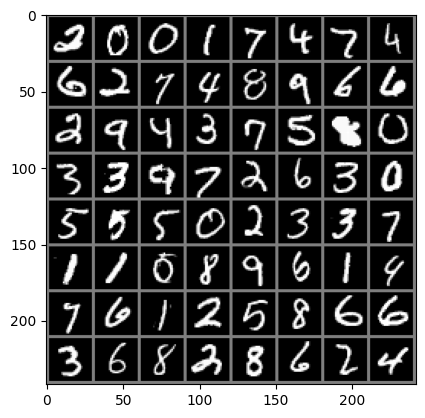

___________
tensor([2, 0, 0, 1, 7])


In [6]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print('___________')
print(labels[0:5])

# CREATING THE MODEL

In [7]:
class DigitClassifer(nn.Module):
    def __init__(self):
        
        super(DigitClassifer, self).__init__()

        #Dense layers
        self.fc1 = nn.Linear(28 * 28, 784)
        self.fc2 = nn.Linear(784, 392)
        self.fc3 = nn.Linear(392, 10)
        
        #Activiation Functions
        self.relu = nn.ReLU()
        
        
    def forward(self, x):
        
        x = x.view(x.size(0), -1) # Input and flattening
        
        x = self.fc1(x) # First fully connected layer
        x = self.relu(x) # RELU activation function
        
        x = self.fc2(x) # Second fully connected layer
        x = self.relu(x) # RELU activation function
        

        x = self.fc3(x) # output layer
        return x
    
model = DigitClassifer()

# COMPILE THE MODEL

In [8]:
# Define the loss function as Cross-Entropy Loss, loss function is commonly used for classification tasks in PyTorch
criterion = nn.CrossEntropyLoss()

# Define the optimizer as Stochastic Gradient Descent (SGD) with learning rate 0.01 and momentum 0.9
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.95)

# TRAIN THE MODEL

In [9]:
# Ensure you have the correct device set up
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move model to the correct device
model.to(device)

num_epochs = 10
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Separate the inputs and the labels
        inputs, labels = data
        
        # Move data to the appropriate device (CPU or GPU)
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero out the gradients
        optimizer.zero_grad()

        # Compute the forward pass
        outputs = model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, labels)
        
        # Propagate the loss backward
        loss.backward()
        
        # Update the weights
        optimizer.step()

        # Accumulate the loss from the batch
        running_loss += loss.item()
    
    # Print loss after each epoch
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

print("Finished Training")

Epoch 1, Loss: 0.3451108360138815
Epoch 2, Loss: 0.1350074390173832
Epoch 3, Loss: 0.09957294264979073
Epoch 4, Loss: 0.07764709741423236
Epoch 5, Loss: 0.062029467771206596
Epoch 6, Loss: 0.04973661320878248
Epoch 7, Loss: 0.04379599405227225
Epoch 8, Loss: 0.03479215475093417
Epoch 9, Loss: 0.030969477256388663
Epoch 10, Loss: 0.026544910380249417
Finished Training


# EVAULUATE THE MODEL

In [10]:
correct = 0
total = 0

# Move the model to the GPU
model = model.to('cuda')

with torch.no_grad():

    #iterate through test data
    for data in testloader:
        #seperate out the images and labels from our data
        images, labels = data

        images = images.to('cuda')  # Move input to GPU
        labels = labels.to('cuda')  # Move labels to GPU

        #get predictions
        outputs = model(images)
        

        _, predicted = torch.max(outputs.data, 1)

        #increat count of number of labels
        total += labels.size(0)

        #accumulate correct predictions
        correct += (predicted == labels).sum().item()


accuracy = (correct / total)  * 100

print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 97.67%
